# An Overview of UK Biobank Data

UKB image processing and quality control paper: https://www.sciencedirect.com/science/article/pii/S1053811917308613?via%3Dihub

For MRI sequences introduction, please refer to wiki page: 
- https://en.wikipedia.org/wiki/Magnetic_resonance_imaging
- https://en.wikipedia.org/wiki/MRI_sequence#Neuromelanin_imaging


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

BASE_IMG_PATH = '/Users/lida/UKB_demo_data/' + 'UKBiobank_BrainImaging_GroupMeanTemplates'

# UKBiobank_BrainImaging_GroupMeanTemplates

- example provided by UK biobank
- 42 image files, 1 folder
- total data size: 1.12 GB
- single image size: from 3 KB to 87 MB

## Structural MRI:
T1, T1_preunbiased, T2_FLAIR, T2_FLAIR_preunbiased

T2-FLAIR stands for T2-weighted-Fluid-Attenuated Inversion Recovery. 

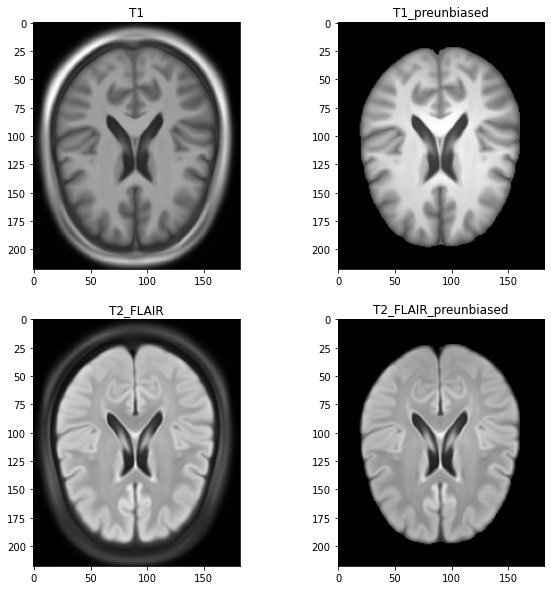

In [2]:
filename = ['T1', 'T1_preunbiased', 'T2_FLAIR', 'T2_FLAIR_preunbiased']

fig, axs = plt.subplots(2,2, figsize = (10, 10))
cmap_name = 'gray'
axs = axs.ravel()
for ind in range(4):
    filepath = BASE_IMG_PATH + '/' + filename[ind] + '.nii.gz'
    img = nib.load(filepath).get_fdata()
    img = img[:,:,img.shape[2]//2].transpose()
    axs[ind].imshow(img, cmap=cmap_name)
    axs[ind].set_title(filename[ind])

## RESTING-STATE fMRI:

Functional MRI (fMRI) measures signal changes in the brain that are due to changing neural activity.
It is used to understand how different parts of the brain respond to external stimuli or passive activity in a resting state, and has applications in behavioral and cognitive research, and in planning neurosurgery of eloquent brain areas.

MNI152 standard-space group-ICA maps at two dimensionalities (detail of parcellation):
- rfMRI_ICA_d25.nii.gz
- rfMRI_ICA_d100.nii.gz
    
rfMRI_ICA_d25, rfMRI_ICA_d100

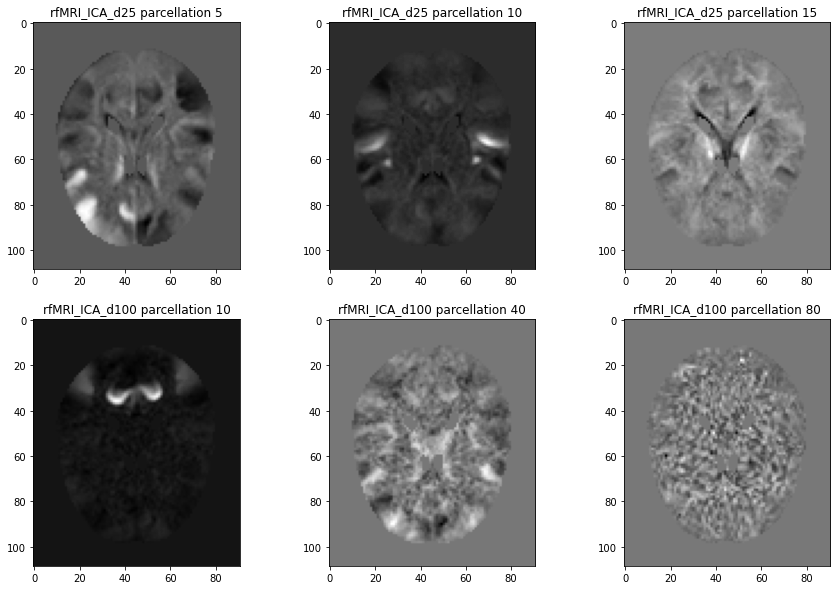

In [3]:
filename = ['rfMRI_ICA_d25', 'rfMRI_ICA_d100']
parcellation = [5, 10, 15, 10, 40, 80]

fig, axs = plt.subplots(2,3, figsize = (15, 10))
cmap_name = 'gray'
axs = axs.ravel()

for ind_name in range(2):
    filepath = BASE_IMG_PATH + '/' + filename[ind_name] + '.nii.gz'
    img = nib.load(filepath).get_fdata()
    for ind_par in range(3):
        ind = ind_name * 3 + ind_par
        img_2d = img[:,:,:,parcellation[ind]]
        img_2d = img_2d[:,:,img_2d.shape[2]//2].transpose()
        axs[ind].imshow(img_2d, cmap=cmap_name)
        axs[ind].set_title(filename[ind_name] + ' parcellation ' + str(parcellation[ind]))

## TASK fMRI:

Group-average activation contrasts (fixed-effect z-statistics):
- tfMRI_zstat1_FE.nii.gz ("Shapes")
- tfMRI_zstat2_FE.nii.gz ("Faces")
- tfMRI_zstat5_FE.nii.gz ("Faces-Shapes")

Group-average-based ROI masks:
- tfMRI_mask1.nii.gz  ("Shapes")
- tfMRI_mask2.nii.gz  ("Faces")
- tfMRI_mask5.nii.gz  ("Faces-Shapes")
- tfMRI_mask5a.nii.gz ("Faces-Shapes" in amygdala)

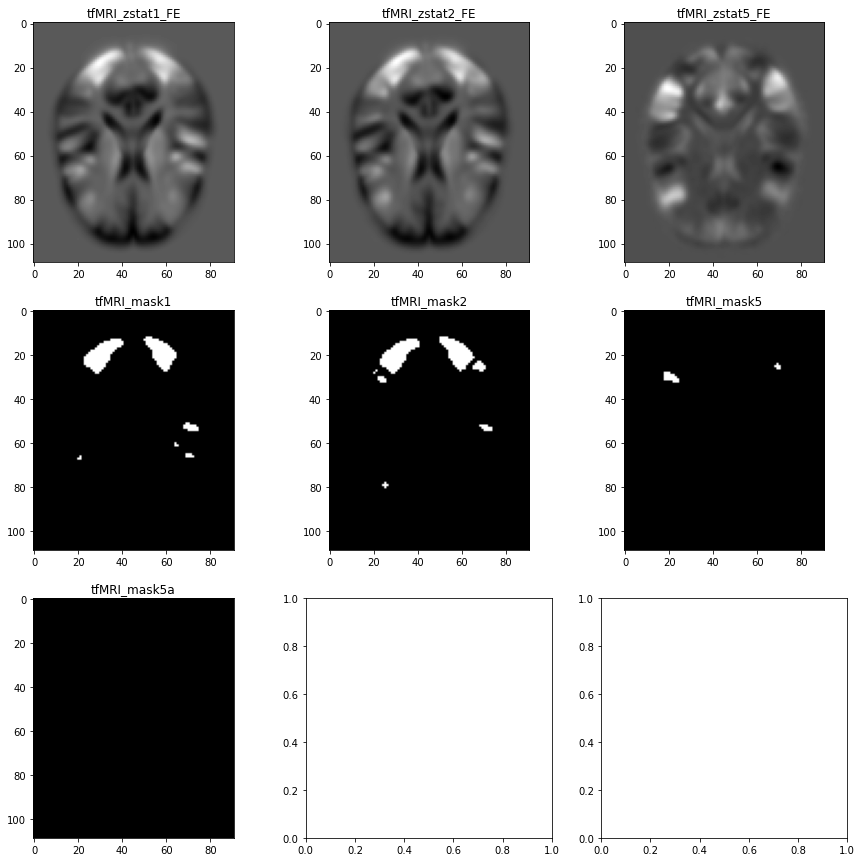

In [4]:
filename = ['tfMRI_zstat1_FE', 'tfMRI_zstat2_FE', 'tfMRI_zstat5_FE', 'tfMRI_mask1', 'tfMRI_mask2', 'tfMRI_mask5', 'tfMRI_mask5a']

fig, axs = plt.subplots(3,3, figsize = (15, 15))
cmap_name = 'gray'
axs = axs.ravel()

for ind in range(7):
    filepath = BASE_IMG_PATH + '/' + filename[ind] + '.nii.gz'
    img = nib.load(filepath).get_fdata()
    img = img[:,:,img.shape[2]//2].transpose()
    axs[ind].imshow(img, cmap=cmap_name)
    axs[ind].set_title(filename[ind])

## DIFFUSION MRI

Diffusion MRI measures the diffusion of water molecules in biological tissues.
Clinically, diffusion MRI is useful for the diagnoses of conditions (e.g., stroke) or neurological disorders (e.g., multiple sclerosis), and helps better understand the connectivity of white matter axons in the central nervous system.

Tensor fit
- dti_FA.nii.gz = fractional anisotropy
- dti_MD.nii.gz = mean diffusivity
- dti_MO.nii.gz = tensor mode
- dti_L1.nii.gz dti_L2.nii.gz dti_L3.nii.gz = tensor eigenvalues
- dti_V1.nii.gz dti_V2.nii.gz dti_V3.nii.gz = tensor eigenvectors

NODDI modelling
- NODDI_ICVF.nii.gz  = intra-cellular volume fraction
- NODDI_ISOVF.nii.gz = isotropic or free water volume fraction
- NODDI_OD.nii.gz    = orientation dispersion index

Probabilistic tractography - voxelwise modelling
- dyads1.nii.gz dyads2.nii.gz dyads3.nii.gz = tract directions for fibre populations 1,2,3
- dyads1_thr.nii.gz dyads2_thr.nii.gz dyads3_thr.nii.gz = dyads after thresholding according to volume fraction (likelihood of that tract being present)
- dyads1_dispersion.nii.gz dyads2_dispersion.nii.gz dyads3_dispersion.nii.gz = uncertainties on tract directions
- mean_f1samples.nii.gz mean_f2samples.nii.gz mean_f3samples.nii.gz = volume fractions of fibre populations 1,2,3 ("strength")
- sum_f123samples.nii.gz = volume fraction sum across all 3 fibres

Probabilistic tractography
- tracts/* = AutoPtx tract outputs for 27 separate tracts
- TractsSummed.nii.gz = summation across all 27 tracts

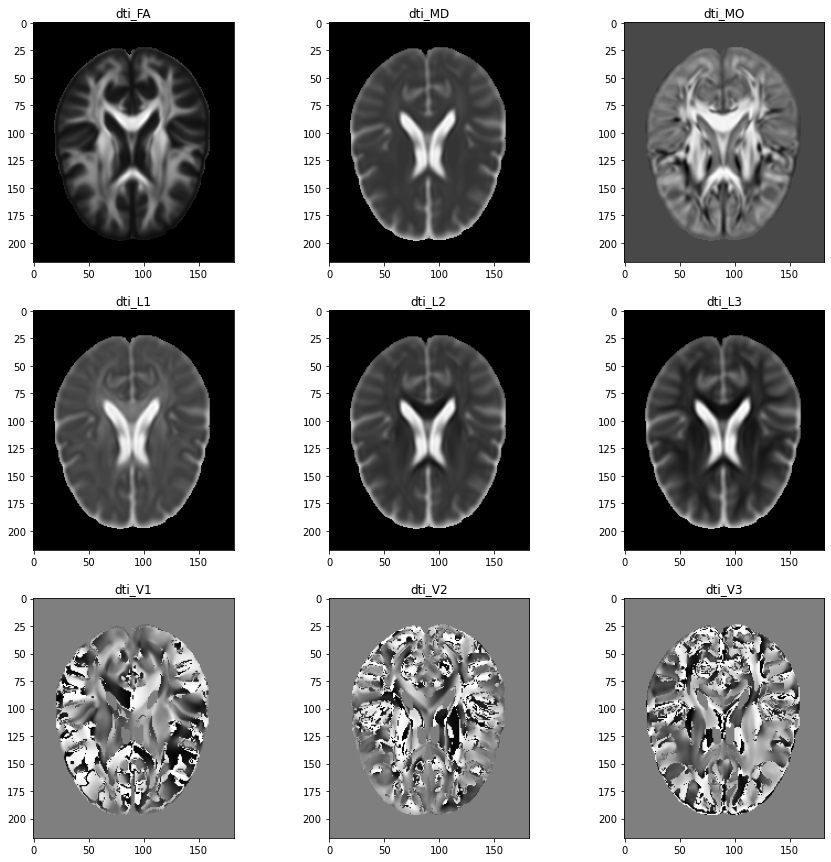

In [5]:
# Tensor fit
filename = ['dti_FA', 'dti_MD', 'dti_MO', 'dti_L1', 'dti_L2', 'dti_L3', 'dti_V1', 'dti_V2', 'dti_V3']

fig, axs = plt.subplots(3,3, figsize = (15, 15))
cmap_name = 'gray'
axs = axs.ravel()

for ind in range(9):
    filepath = BASE_IMG_PATH + '/' + filename[ind] + '.nii.gz'
    img = nib.load(filepath).get_fdata()
    if img.ndim > 3:
        img = img[:,:,:,0]
    img = img[:,:,img.shape[2]//2].transpose()
    axs[ind].imshow(img, cmap=cmap_name)
    axs[ind].set_title(filename[ind])

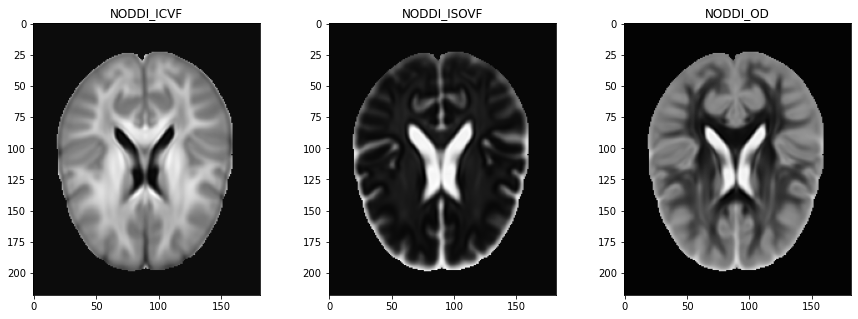

In [6]:
# NODDI modelling
filename = ['NODDI_ICVF', 'NODDI_ISOVF', 'NODDI_OD']

fig, axs = plt.subplots(1,3, figsize = (15, 5))
cmap_name = 'gray'
axs = axs.ravel()

for ind in range(3):
    filepath = BASE_IMG_PATH + '/' + filename[ind] + '.nii.gz'
    img = nib.load(filepath).get_fdata()
#     if img.ndim > 3:
#         img = img[:,:,:,0]
    img = img[:,:,img.shape[2]//2].transpose()
    axs[ind].imshow(img, cmap=cmap_name)
    axs[ind].set_title(filename[ind])

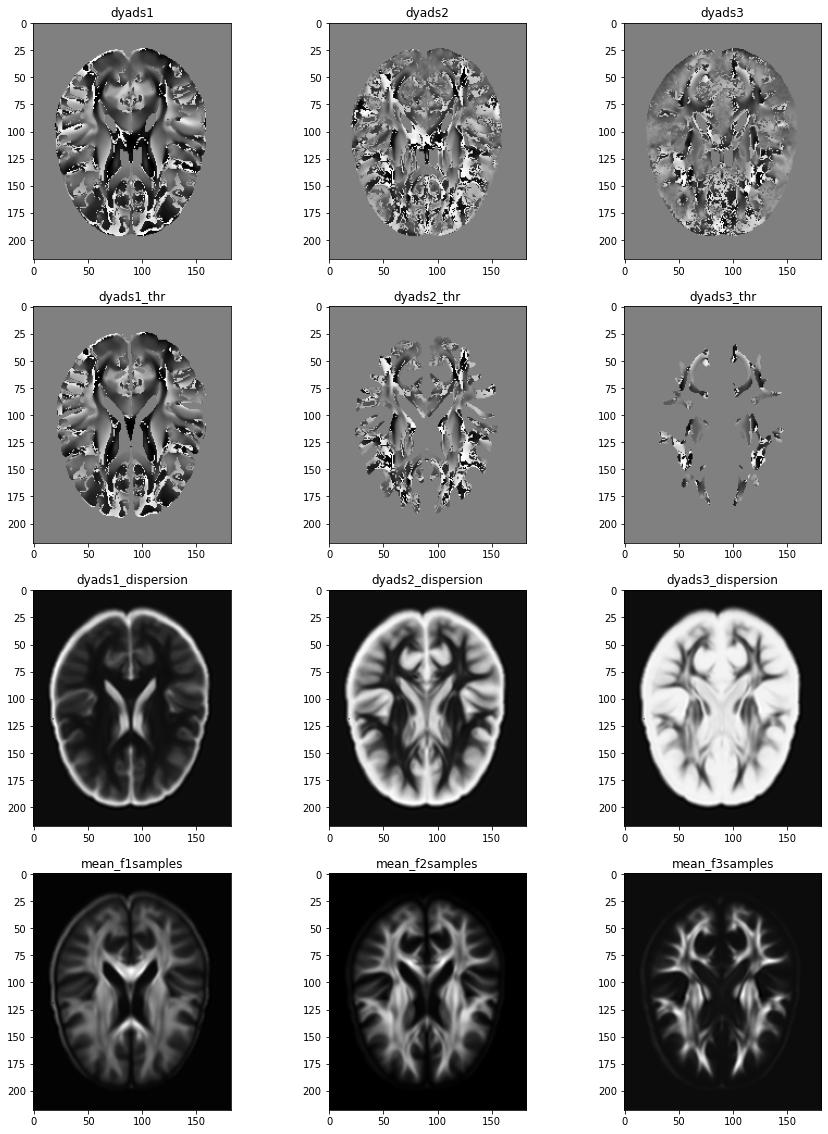

In [7]:
# Probabilistic tractography - voxelwise modelling
filename = ['dyads1', 'dyads2', 'dyads3', 'dyads1_thr', 'dyads2_thr', 'dyads3_thr', 'dyads1_dispersion', 'dyads2_dispersion', 'dyads3_dispersion', 'mean_f1samples', 'mean_f2samples', 'mean_f3samples']

fig, axs = plt.subplots(4,3, figsize = (15, 20))
cmap_name = 'gray'
axs = axs.ravel()

for ind in range(12):
    filepath = BASE_IMG_PATH + '/' + filename[ind] + '.nii.gz'
    img = nib.load(filepath).get_fdata()
    if img.ndim > 3:
        img = img[:,:,:,1]
    img = img[:,:,img.shape[2]//2].transpose()
    axs[ind].imshow(img, cmap=cmap_name)
    axs[ind].set_title(filename[ind])
    

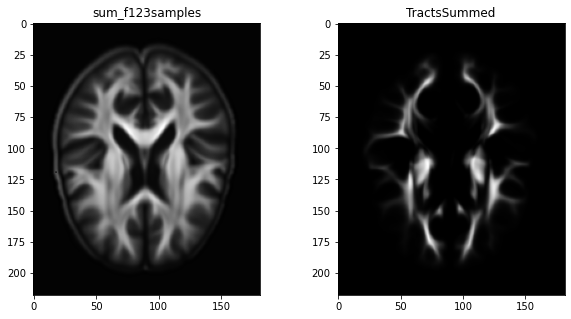

In [8]:
filename = ['sum_f123samples', 'TractsSummed']

fig, axs = plt.subplots(1,2, figsize = (10, 5))
cmap_name = 'gray'
axs = axs.ravel()

for ind in range(2):
    filepath = BASE_IMG_PATH + '/' + filename[ind] + '.nii.gz'
    img = nib.load(filepath).get_fdata()
    if img.ndim > 3:
        img = img[:,:,:,1]
    img = img[:,:,img.shape[2]//2].transpose()
    axs[ind].imshow(img, cmap=cmap_name)
    axs[ind].set_title(filename[ind])
    